# Step 9: Validate Charging Station Placement Model

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from shapely.geometry import Point
import numpy as np

# 1. Loading and Prepare Data

# Assuming `df_existing` contains existing station locations and `df_optimized` contains optimized locations
df_existing = df_cleaned.copy()  # Existing charging stations
df_optimized_new = df_optimized[df_optimized["Optimized_Station"] == 1]  # New optimized stations

# Loading the land shapefile  again for reference
land = gpd.read_file("/content/drive/MyDrive/10m_physical/ne_10m_land.shp")


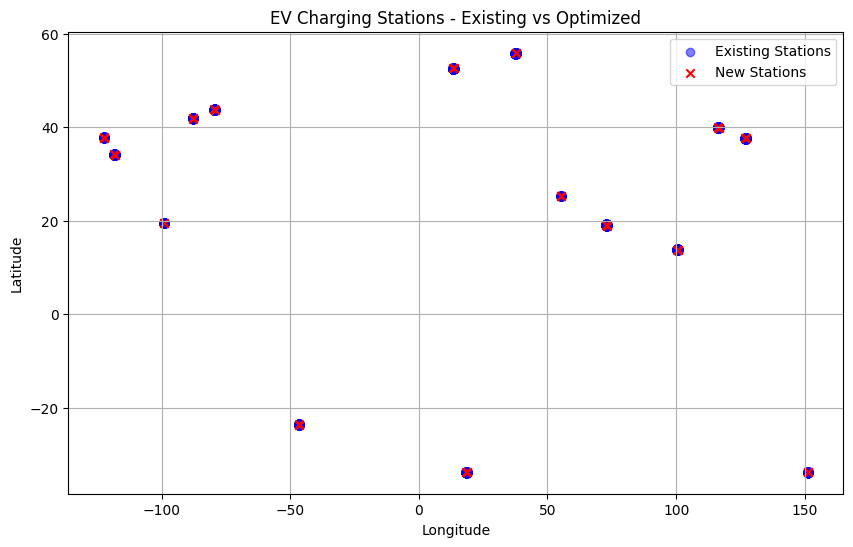

In [ ]:
# 2. Plotting Geospatial Heatmap of Charging Stations

plt.figure(figsize=(10, 6))

# Plotting existing charging stations
plt.scatter(df_existing["longitude"], df_existing["latitude"], c="blue", alpha=0.5, label="Existing Stations")

# Plotting optimized new stations
plt.scatter(df_optimized_new["longitude"], df_optimized_new["latitude"], c="red", marker="x", label="New Stations")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("EV Charging Stations - Existing vs Optimized")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 3. Creating a Folium Map for Visualization

# Create a Folium map centered at the average station location
center_lat, center_long = df_existing["latitude"].mean(), df_existing["longitude"].mean()
map_stations = folium.Map(location=[center_lat, center_long], zoom_start=6)

# Plotting existing stations in blue
for _, row in df_existing.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=3,
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.7,
        popup=f"Existing Station - {row['city']}"
    ).add_to(map_stations)

# Plotting optimized stations in red
for _, row in df_optimized_new.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"New Optimized Station - {row['city']}",
        icon=folium.Icon(color="red", icon="bolt")
    ).add_to(map_stations)

print("Displaying optimized station placement map:")
display(map_stations)

Displaying optimized station placement map:


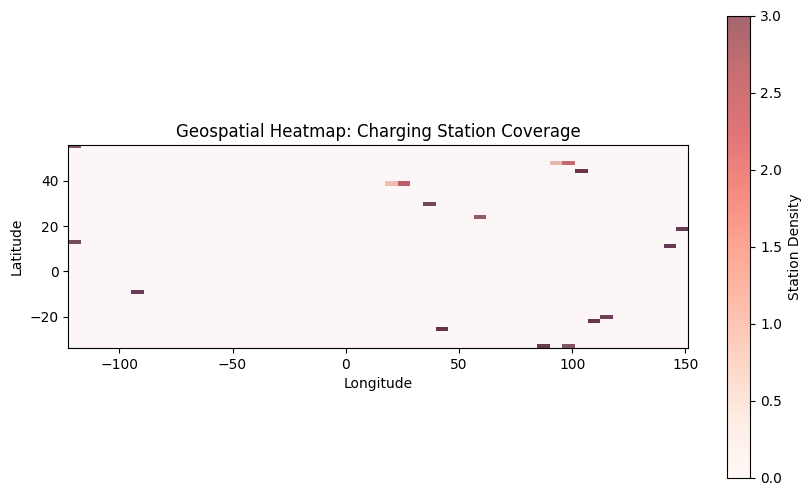

 Station coverage analysis complete!


In [ ]:
# 4. Assess Coverage ie. Identify Areas Needing More Stations

# Defininmg grid for station density estimation
grid_lat = np.linspace(df_existing["latitude"].min(), df_existing["latitude"].max(), 50)
grid_long = np.linspace(df_existing["longitude"].min(), df_existing["longitude"].max(), 50)

# Calculating station density
density_existing, _, _ = np.histogram2d(df_existing["latitude"], df_existing["longitude"], bins=[grid_lat, grid_long])
density_optimized, _, _ = np.histogram2d(df_optimized_new["latitude"], df_optimized_new["longitude"], bins=[grid_lat, grid_long])

# Heatmap of station coverage
plt.figure(figsize=(10, 6))
plt.imshow(density_existing.T, origin="lower", extent=[grid_long.min(), grid_long.max(), grid_lat.min(), grid_lat.max()], cmap="Blues", alpha=0.6)
plt.imshow(density_optimized.T, origin="lower", extent=[grid_long.min(), grid_long.max(), grid_lat.min(), grid_lat.max()], cmap="Reds", alpha=0.6)
plt.colorbar(label="Station Density")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Heatmap: Charging Station Coverage")
plt.show()

print(" Station coverage analysis complete!")